<a href="https://colab.research.google.com/github/dzkha/DS-Unit-2-Regression-2/blob/master/module4-partial-dependence-plots/pdp_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip caterpillar-tube-pricing.zip

Archive:  caterpillar-tube-pricing.zip
  inflating: sample_submission.csv   
  inflating: data.zip                


In [3]:
!unzip data.zip

Archive:  data.zip
   creating: competition_data/
  inflating: competition_data/bill_of_materials.csv  
  inflating: competition_data/comp_adaptor.csv  
  inflating: competition_data/comp_boss.csv  
  inflating: competition_data/comp_elbow.csv  
  inflating: competition_data/comp_float.csv  
  inflating: competition_data/comp_hfl.csv  
  inflating: competition_data/comp_nut.csv  
  inflating: competition_data/comp_other.csv  
  inflating: competition_data/comp_sleeve.csv  
  inflating: competition_data/comp_straight.csv  
  inflating: competition_data/comp_tee.csv  
  inflating: competition_data/comp_threaded.csv  
  inflating: competition_data/components.csv  
  inflating: competition_data/specs.csv  
  inflating: competition_data/test_set.csv  
  inflating: competition_data/train_set.csv  
  inflating: competition_data/tube.csv  
  inflating: competition_data/tube_end_form.csv  
  inflating: competition_data/type_component.csv  
  inflating: competition_data/type_connection.csv  
  i

In [6]:
from glob import glob
import pandas as pd

for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    print(path, df.shape)

competition_data/comp_nut.csv (65, 11)
competition_data/comp_elbow.csv (178, 16)
competition_data/tube.csv (21198, 16)
competition_data/comp_boss.csv (147, 15)
competition_data/test_set.csv (30235, 8)
competition_data/specs.csv (21198, 11)
competition_data/comp_hfl.csv (6, 9)
competition_data/type_connection.csv (14, 2)
competition_data/comp_tee.csv (4, 14)
competition_data/comp_sleeve.csv (50, 10)
competition_data/comp_other.csv (1001, 3)
competition_data/train_set.csv (30213, 8)
competition_data/comp_straight.csv (361, 12)
competition_data/comp_float.csv (16, 7)
competition_data/bill_of_materials.csv (21198, 17)
competition_data/comp_adaptor.csv (25, 20)
competition_data/type_end_form.csv (8, 2)
competition_data/tube_end_form.csv (27, 2)
competition_data/components.csv (2048, 3)
competition_data/comp_threaded.csv (194, 32)
competition_data/type_component.csv (29, 2)


In [0]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [0]:
trainval = pd.read_csv('competition_data/train_set.csv')
test = pd.read_csv('competition_data/test_set.csv')

In [0]:
trainval['quote_date'] = pd.to_datetime(trainval['quote_date'], infer_datetime_format=True)
test['quote_date'] = pd.to_datetime(test['quote_date'], infer_datetime_format=True)

In [0]:
trainval_tube_assemblies = trainval['tube_assembly_id'].unique()
test_tube_assemblies = test['tube_assembly_id'].unique()

In [0]:
from sklearn.model_selection import train_test_split
train_tube_assemblies, val_tube_assemblies = train_test_split(
    trainval_tube_assemblies, random_state=42)

In [0]:
train = trainval[trainval.tube_assembly_id.isin(train_tube_assemblies)]
val = trainval[trainval.tube_assembly_id.isin(val_tube_assemblies)]

In [13]:
!pip install category_encoders

     |████████████████████████████████| 92kB 5.9MB/s 


In [0]:
for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    shared_columns = set(df.columns) & set(train.columns)
    if shared_columns:
        print(path, df.shape)
        print(df.columns.tolist(), '\n')

competition_data/bill_of_materials.csv (21198, 17)
['tube_assembly_id', 'component_id_1', 'quantity_1', 'component_id_2', 'quantity_2', 'component_id_3', 'quantity_3', 'component_id_4', 'quantity_4', 'component_id_5', 'quantity_5', 'component_id_6', 'quantity_6', 'component_id_7', 'quantity_7', 'component_id_8', 'quantity_8'] 

competition_data/specs.csv (21198, 11)
['tube_assembly_id', 'spec1', 'spec2', 'spec3', 'spec4', 'spec5', 'spec6', 'spec7', 'spec8', 'spec9', 'spec10'] 

competition_data/test_set.csv (30235, 8)
['id', 'tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity'] 

competition_data/train_set.csv (30213, 8)
['tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'cost'] 

competition_data/tube.csv (21198, 16)
['tube_assembly_id', 'material_id', 'diameter', 'wall', 'length', 'num_bends', 'bend_radius', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end

In [14]:
tube = pd.read_csv('competition_data/tube.csv')

for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    shared_columns = set(df.columns) & set(tube.columns)
    if shared_columns:
        print(path, df.shape)
        print(df.columns.tolist(), '\n')

competition_data/comp_nut.csv (65, 11)
['component_id', 'component_type_id', 'hex_nut_size', 'seat_angle', 'length', 'thread_size', 'thread_pitch', 'diameter', 'blind_hole', 'orientation', 'weight'] 

competition_data/tube.csv (21198, 16)
['tube_assembly_id', 'material_id', 'diameter', 'wall', 'length', 'num_bends', 'bend_radius', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end_a', 'end_x', 'num_boss', 'num_bracket', 'other'] 

competition_data/test_set.csv (30235, 8)
['id', 'tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity'] 

competition_data/specs.csv (21198, 11)
['tube_assembly_id', 'spec1', 'spec2', 'spec3', 'spec4', 'spec5', 'spec6', 'spec7', 'spec8', 'spec9', 'spec10'] 

competition_data/comp_sleeve.csv (50, 10)
['component_id', 'component_type_id', 'connection_type_id', 'length', 'intended_nut_thread', 'intended_nut_pitch', 'unique_feature', 'plating', 'orientation', 'weight'] 

competition_data/train_set.csv (

In [0]:
tube = pd.read_csv('competition_data/tube.csv')

for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    print(path, df.shape)
    print(df.columns.tolist(), '\n')

competition_data/bill_of_materials.csv (21198, 17)
['tube_assembly_id', 'component_id_1', 'quantity_1', 'component_id_2', 'quantity_2', 'component_id_3', 'quantity_3', 'component_id_4', 'quantity_4', 'component_id_5', 'quantity_5', 'component_id_6', 'quantity_6', 'component_id_7', 'quantity_7', 'component_id_8', 'quantity_8'] 

competition_data/comp_float.csv (16, 7)
['component_id', 'component_type_id', 'bolt_pattern_long', 'bolt_pattern_wide', 'thickness', 'orientation', 'weight'] 

competition_data/comp_adaptor.csv (25, 20)
['component_id', 'component_type_id', 'adaptor_angle', 'overall_length', 'end_form_id_1', 'connection_type_id_1', 'length_1', 'thread_size_1', 'thread_pitch_1', 'nominal_size_1', 'end_form_id_2', 'connection_type_id_2', 'length_2', 'thread_size_2', 'thread_pitch_2', 'nominal_size_2', 'hex_size', 'unique_feature', 'orientation', 'weight'] 

competition_data/comp_hfl.csv (6, 9)
['component_id', 'component_type_id', 'hose_diameter', 'corresponding_shell', 'coupling_

In [0]:
def wrangle(X):
    X = X.copy()
    
    # Engineer date features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_date_year'] = X['quote_date'].dt.year
    X['quote_date_month'] = X['quote_date'].dt.month
    X = X.drop(columns='quote_date')
    
    # Merge data
    tube = pd.read_csv('competition_data/tube.csv')
    specs = pd.read_csv('competition_data/specs.csv')
    bill_of_materials = pd.read_csv('competition_data/bill_of_materials.csv')
    
    X = X.merge(tube, how='left')
    X = X.merge(specs, how='left')
    X = X.merge(bill_of_materials, how='left')
    
    
    # Drop tube_assembly_id because our goal is to predict unknown assemblies
    X = X.drop(columns='tube_assembly_id')
    
    #Fill NaNs
    X.fillna(0, inplace=True)
    
    return X


train_wrangled = wrangle(train)
val_wrangled = wrangle(val)
test_wrangled = wrangle(test)
trainval_wrangled = wrangle(trainval)

In [0]:
target = 'cost'
y_train = train[target]
y_val = val[target]
y_trainval = trainval[target]

y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_trainval_log = np.log1p(y_trainval)

features = train_wrangled.columns.drop('cost')
X_train = train_wrangled[features]
X_val = val_wrangled[features]
X_trainval = trainval_wrangled[features]

X_test = test_wrangled[features]

In [0]:
specs

NameError: ignored

In [0]:
X_train

,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,quote_date_year,quote_date_month,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,S-0066,0,0,Yes,1,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S-0066,0,0,Yes,2,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S-0066,0,0,Yes,5,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S-0066,0,0,Yes,10,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S-0066,0,0,Yes,25,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,S-0066,0,0,Yes,50,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,S-0066,0,0,Yes,100,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,S-0066,0,0,Yes,250,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,S-0066,0,0,Yes,1,2013,9,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,S-0066,0,0,Yes,2,2013,9,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
test_wrangled

,id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,quote_date_year,quote_date_month,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,1,S-0066,0,0,Yes,1,2013,6,SP-0035,12.70,1.65,164.00,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,2,S-0066,0,0,Yes,2,2013,6,SP-0035,12.70,1.65,164.00,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,3,S-0066,0,0,Yes,5,2013,6,SP-0035,12.70,1.65,164.00,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,4,S-0066,0,0,Yes,10,2013,6,SP-0035,12.70,1.65,164.00,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,5,S-0066,0,0,Yes,25,2013,6,SP-0035,12.70,1.65,164.00,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
5,6,S-0066,0,0,Yes,50,2013,6,SP-0035,12.70,1.65,164.00,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
6,7,S-0066,0,0,Yes,100,2013,6,SP-0035,12.70,1.65,164.00,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
7,8,S-0066,0,0,Yes,250,2013,6,SP-0035,12.70,1.65,164.00,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
8,9,S-0066,0,0,Yes,1,2013,7,SP-0019,6.35,0.71,127.00,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1312,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
9,10,S-0066,0,0,Yes,2,2013,7,SP-0019,6.35,0.71,127.00,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1312,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [0]:
X_train.shape

(22628, 48)

In [0]:
X_train.isna().sum()

supplier                  0
annual_usage              0
min_order_quantity        0
bracket_pricing           0
quantity                  0
quote_date_year           0
quote_date_month          0
material_id             167
diameter                  0
wall                      0
length                    0
num_bends                 0
bend_radius               0
end_a_1x                  0
end_a_2x                  0
end_x_1x                  0
end_x_2x                  0
end_a                     0
end_x                     0
num_boss                  0
num_bracket               0
other                     0
spec1                 18322
spec2                 18521
spec3                 19172
spec4                 20164
spec5                 20906
spec6                 21365
spec7                 22408
spec8                 22593
spec9                 22625
spec10                22628
component_id_1         1091
quantity_1             1091
component_id_2         6895
quantity_2          

In [0]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [0]:
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline



pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
#     RobustScaler(),
    RandomForestRegressor(n_estimators=1000, random_state=55, n_jobs=-1)
)

pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val)
rmse(y_val_log, y_pred_log)

0.30116786608672774

In [0]:
X_train

,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,quote_date_year,quote_date_month,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,S-0066,0,0,Yes,1,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1312,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,S-0066,0,0,Yes,2,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1312,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,S-0066,0,0,Yes,5,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1312,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,S-0066,0,0,Yes,10,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1312,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,S-0066,0,0,Yes,25,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1312,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
5,S-0066,0,0,Yes,50,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1312,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
6,S-0066,0,0,Yes,100,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1312,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
7,S-0066,0,0,Yes,250,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1312,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
8,S-0066,0,0,Yes,1,2013,9,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1624,1.0,C-1631,1.0,C-1641,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
9,S-0066,0,0,Yes,2,2013,9,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1624,1.0,C-1631,1.0,C-1641,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [0]:
test_1 = test

In [0]:
X_test

,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,quote_date_year,quote_date_month,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,S-0066,0,0,Yes,1,2013,6,SP-0035,12.70,1.65,164.00,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,S-0066,0,0,Yes,2,2013,6,SP-0035,12.70,1.65,164.00,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,S-0066,0,0,Yes,5,2013,6,SP-0035,12.70,1.65,164.00,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,S-0066,0,0,Yes,10,2013,6,SP-0035,12.70,1.65,164.00,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,S-0066,0,0,Yes,25,2013,6,SP-0035,12.70,1.65,164.00,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
5,S-0066,0,0,Yes,50,2013,6,SP-0035,12.70,1.65,164.00,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
6,S-0066,0,0,Yes,100,2013,6,SP-0035,12.70,1.65,164.00,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
7,S-0066,0,0,Yes,250,2013,6,SP-0035,12.70,1.65,164.00,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1622,2.0,C-1629,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
8,S-0066,0,0,Yes,1,2013,7,SP-0019,6.35,0.71,127.00,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1312,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
9,S-0066,0,0,Yes,2,2013,7,SP-0019,6.35,0.71,127.00,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0,0,0,0,0,0,0,0,0,0,0,C-1312,2.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [0]:
X_test_2 = X_test

# Code from https://stackoverflow.com/questions/46349355/could-not-convert-categorical-data-to-number-onehotencoder

from sklearn import preprocessing

for c in X_test_2.columns:
    X_test_2[c]=X_test_2[c].apply(str)
    le=preprocessing.LabelEncoder().fit(X_test_2[c])
    X_test_2[c] =le.transform(X_test_2[c])
    pd.to_numeric(X_test_2[c]).astype(np.float)

y_test_pred_log = pipeline.predict(X_test_2)
y_test_pred = np.expm1(y_test_pred_log)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [0]:
print(y_pred_log)

[3.13134169 2.59060627 2.0281837  ... 3.33312233 1.9352045  1.65961492]


In [0]:
for c in X_trainval.columns:
    X_trainval[c]=X_trainval[c].apply(str)
    le=preprocessing.LabelEncoder().fit(X_trainval[c])
    X_trainval[c] =le.transform(X_trainval[c])
    pd.to_numeric(X_trainval[c]).astype(np.float)

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RobustScaler(),
    RandomForestRegressor(n_estimators=1000, random_state=55, n_jobs=-1)
)

pipeline.fit(X_trainval, y_trainval_log)
y_pred_log = pipeline.predict(X_trainval)
y_test_pred = np.expm1(y_test_pred_log)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [18]:
%%time
#Now do XGBoost

import category_encoders as ce
from xgboost import XGBRegressor
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

eval_set = [(X_train_encoded, y_train_log), 
            (X_val_encoded, y_val_log)]


model = XGBRegressor(n_estimators=1000, n_jobs=-1)
model.fit(X_train_encoded, y_train_log, eval_set=eval_set, eval_metric='rmse') 
          #early_stopping_rounds=10)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:41:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.71923	validation_1-rmse:1.70792
[1]	validation_0-rmse:1.56502	validation_1-rmse:1.55432
[2]	validation_0-rmse:1.42775	validation_1-rmse:1.41736
[3]	validation_0-rmse:1.30336	validation_1-rmse:1.2934
[4]	validation_0-rmse:1.1916	validation_1-rmse:1.18282
[5]	validation_0-rmse:1.09323	validation_1-rmse:1.08436
[6]	validation_0-rmse:1.00509	validation_1-rmse:0.997156
[7]	validation_0-rmse:0.928291	validation_1-rmse:0.923293
[8]	validation_0-rmse:0.860016	validation_1-rmse:0.855506
[9]	validation_0-rmse:0.798719	validation_1-rmse:0.794621
[10]	validation_0-rmse:0.746125	validation_1-rmse:0.74466
[11]	validation_0-rmse:0.699239	validation_1-rmse:0.69843
[12]	validation_0-rmse:0.658747	validation_1-rmse:0.659467
[13]	validation_0-rmse:0.622918	validation_1-rmse:0.625653
[14]	validation_0-rmse:0.592305	validation_1-rmse:0.596544
[15]	validation

In [0]:
X_test_encoded = encoder.transform(X_test)

In [20]:
#Spec 10 is not encoded properly because there's only 1 entry in the whole set.
#So we'll just set it to 0

X_test_encoded.dtypes

supplier              float64
annual_usage            int64
min_order_quantity      int64
bracket_pricing         int64
quantity                int64
quote_date_year         int64
quote_date_month        int64
material_id             int64
diameter              float64
wall                  float64
length                float64
num_bends               int64
bend_radius           float64
end_a_1x                int64
end_a_2x                int64
end_x_1x                int64
end_x_2x                int64
end_a                   int64
end_x                 float64
num_boss                int64
num_bracket             int64
other                   int64
spec1                 float64
spec2                 float64
spec3                 float64
spec4                 float64
spec5                 float64
spec6                 float64
spec7                 float64
spec8                 float64
spec9                 float64
spec10                 object
component_id_1        float64
quantity_1

In [0]:
X_test_encoded['spec10'] = 0

In [0]:
#Find test predictions

y_test_pred_log = model.predict(X_test_encoded)
y_test_pred = np.expm1(y_test_pred_log)

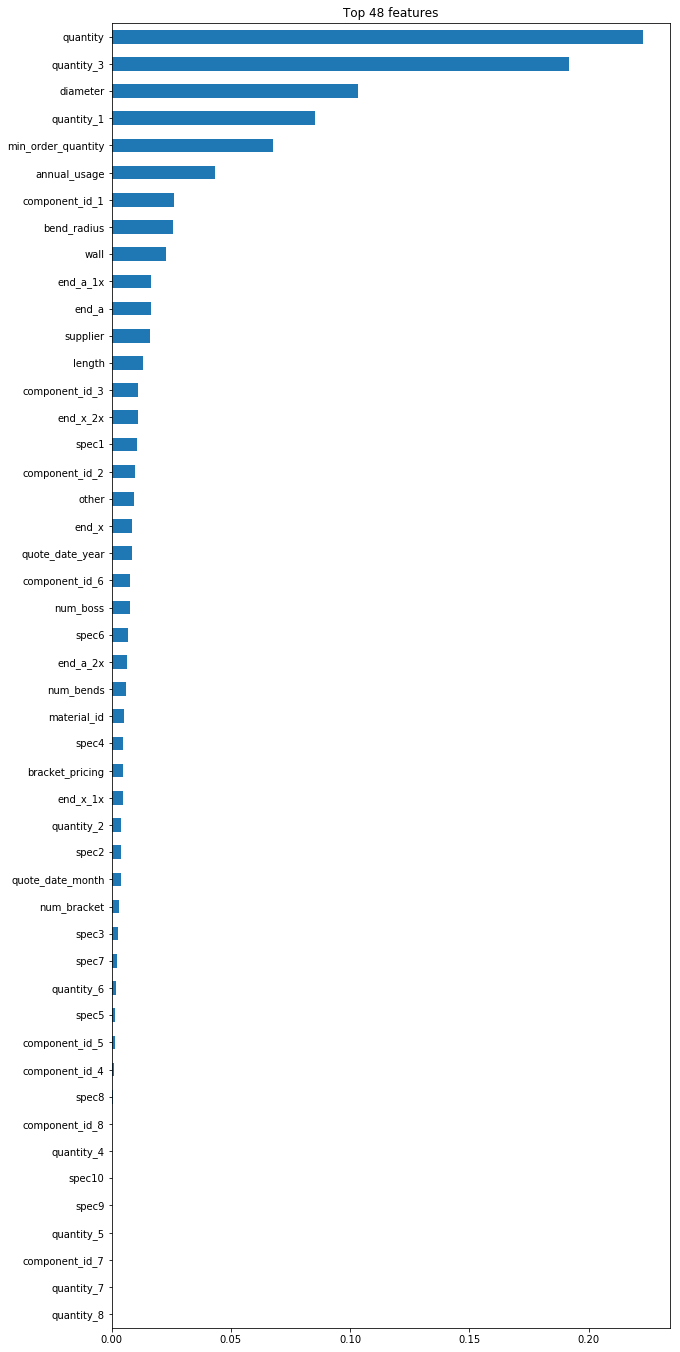

In [29]:
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, X_train_encoded.columns)

# Plot feature importances
n = len(X_train_encoded.columns)
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values().plot.barh();

In [31]:
!pip install eli5

     |████████████████████████████████| 102kB 1.6MB/s 


In [32]:
#Plot permutation importances
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, scoring='neg_mean_squared_error', 
                                 cv='prefit', n_iter=2, random_state=42)

permuter.fit(X_val_encoded, y_val_log)
feature_names = X_val_encoded.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.7261 ± 0.0094,quantity
0.2450 ± 0.0117,min_order_quantity
0.0670 ± 0.0033,annual_usage
0.0642 ± 0.0003,diameter
0.0516 ± 0.0055,supplier
0.0270 ± 0.0020,quote_date_year
0.0210 ± 0.0010,length
0.0168 ± 0.0015,component_id_1
0.0143 ± 0.0002,end_a
0.0132 ± 0.0006,wall


In [34]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 1.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


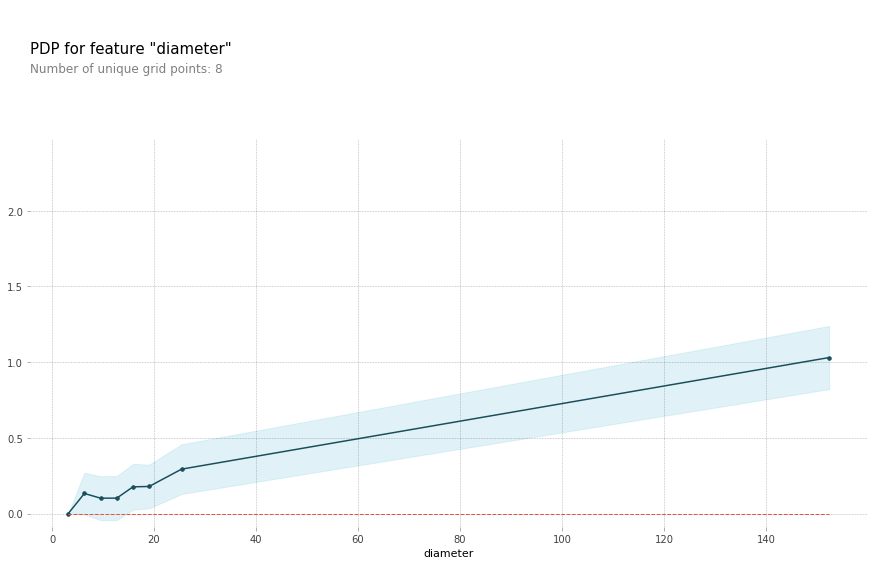

In [35]:
#Plot partial dependence plot
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'diameter'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

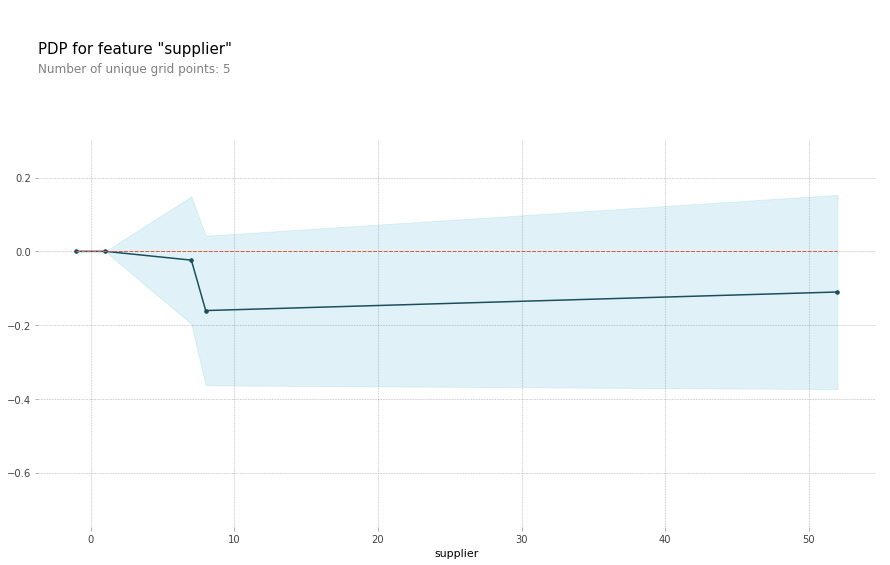

In [42]:
feature = 'supplier'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

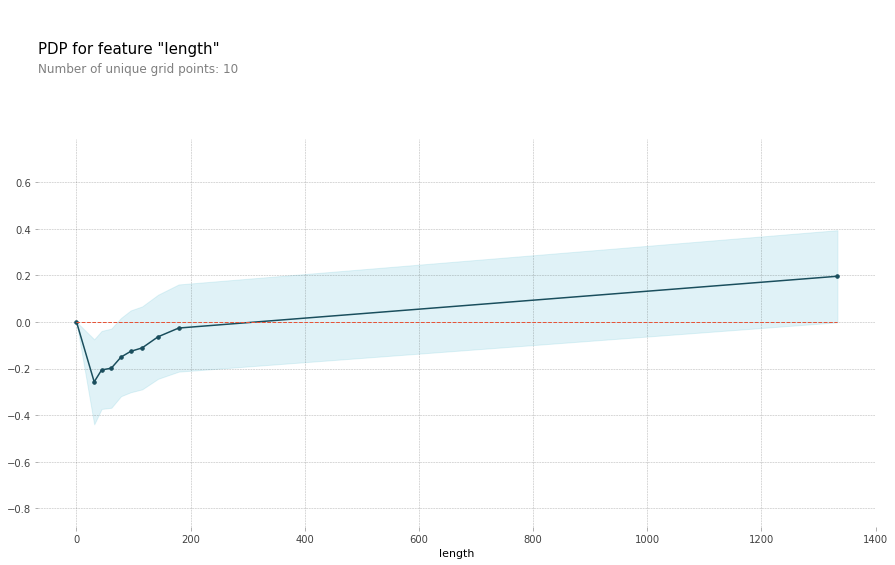

In [36]:
feature = 'length'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

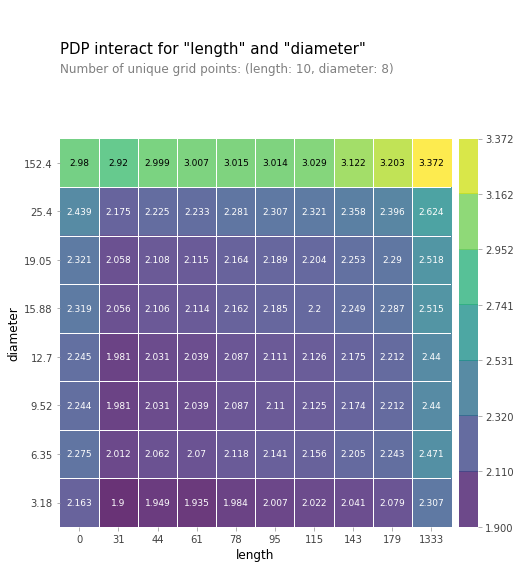

In [37]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['length', 'diameter']

interaction = pdp_interact(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [39]:
tube

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00001,SP-0035,12.70,1.650,164.0,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1,TA-00002,SP-0019,6.35,0.710,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00003,SP-0019,6.35,0.710,127.0,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,TA-00004,SP-0019,6.35,0.710,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00005,SP-0029,19.05,1.240,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0
5,TA-00006,SP-0029,19.05,1.240,79.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0
6,TA-00007,SP-0035,12.70,1.650,202.0,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
7,TA-00008,SP-0039,6.35,0.710,174.0,6,19.05,N,N,N,N,EF-008,EF-008,0,0,0
8,TA-00009,SP-0029,25.40,1.650,135.0,4,63.50,N,N,N,N,EF-003,EF-003,0,0,0
9,TA-00010,SP-0046,42.70,4.800,290.0,4,110.00,N,N,N,N,EF-021,EF-021,0,0,0


In [0]:
#Create submission

sub = pd.read_csv('sample_submission.csv')
sub['cost'] = y_test_pred
sub = sub.set_index('id')
sub.to_csv('tube_submission_05.csv')

sub

,cost
id,
1,25.195148
2,14.262361
3,7.947721
4,5.579892
5,4.458895
6,4.106852
7,3.940891
8,3.855879
9,21.142342
